<a href="https://colab.research.google.com/github/blythe-blythe/Website-Personal/blob/main/amazon_%20Sales%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMAZON SALES**

Tujuan projek ini untuk memprediksi pengaruh diskon terhadap tingkat rating penjualan produk. Projek ini juga menganalisa berbagai faktor yang mempengaruhi penjualan produk berdasarkan perilaku pelanggan.

**Konteks**

Amazon adalah Perusahaan American Tech Multi-National yang berkembang dibidang bisnis termasuk Perdagangan elektronik (E-commerce), Amazon akan membeli dan menjual inventory, dan mengawasi semuanya mulai dari pengiriman dan harga jual untuk pelayanan pelanggan dan pengembalian barang.

**Kamus Data**

Dataset yang digunakan untuk membangun model terdiri dari 1465 data observasi dari 16 variable. Informasi data terdiri dari:


In [ ]:
import pandas as pd
data_dict = pd.read_csv('dict.csv')
data_dict


,Variabel,Keterangan
0,product_id,Product ID
1,product_name,Name of the Product
2,category,Category of the Product
3,discounted_price,Discounted Price of the Product
4,actual_price,Actual Price of the Product
5,discount_percentage,Percentage of Discount for the Product
6,rating,Rating of the Product
7,rating_count,Number of people who voted for the Amazon rating
8,about_product,Description about the Product
9,user_id,ID of the user who wrote review for the Product


# Data Collection

In [ ]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
#load dataset
df = pd.read_csv('amazon.csv')


# Data Understanding

In [ ]:
#Periksa shape dari dataset
df.shape

(1465, 16)

Pada tahap ini dilakukan pengecekan terhadap ukuran dataset. Hasil pengecekan menunjukkan bahwa terdapat 1465 baris dan 16 kolom.


In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Pada tahap ini dilakukan pengecekan terhadap 5 baris pertama dataset. Hasil pengecekan menunjukkan bahwa dataset masih tidak tersusun dengan semestinya.

In [ ]:
#periksa tipe data dari kolom
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


Pada tahap ini dilakukan pengecekan terhadap tipe data setiap field atau kolom dalam dataset. Hasil pengecekan menunjukkan bahwa seluruh field memiliki tipe data object.

In [ ]:
#Periksa missing Values/null
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


Pada tahap ini dilakukan pengecekan terhadap nilai kosong atau null pada setiap kolom dataset. Hasil pengecekan menunjukkan bahwa terdapat 2 data kosong pada kolom rating_count, sedangkan kolom lainnya tidak memiliki nilai hilang.


In [ ]:
df.duplicated().sum()

np.int64(0)

Pada tahap ini dilakukan pengecekan duplikat terhadap baris. Hasil pengecekan menunjukkan bahwa tidak terdapat duplikat pada dataset.


In [ ]:
df.describe()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


Pada tahap ini dilakukan pengecekan terhadap statistik seperti mean, std, min, max. Hasil pengecekan menunjukkan bahwa data belum bisa menunjukkan hasil statistik yang diminta, dikarenakan bukan tipe data numerik.

# Data Preparation

**Feature Selection**

In [ ]:

drop_columns = [
    'product_id',
    'user_id',
    'user_name',
    'review_id',
    'img_link',
    'product_link',
    'about_product',
    'review_content']
df.drop(drop_columns, axis=1, inplace=True)


Drop kolom product_id, user_id, user_name, review_id, img_link, product_link, about_product, dan review_content karena termasuk Index Column dan tidak memberikan informasi tambahan terhadap penjualan (hanya sebagai detail penjualan saja).

In [ ]:
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928","Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363","Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905","As good as original,Decent,Good one for second..."


**Data Type Conversion**

In [ ]:
#discounted_price
df['discounted_price'] = df['discounted_price'].str.replace("₹", "", regex=False)
df['discounted_price'] = df['discounted_price'].str.replace(",", "", regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'])

Kolom discounted_price awalnya berupa string dengan simbol mata uang dan koma. Setelah dibersihkan dan dikonversi ke numerik, kolom ini bisa dipakai untuk perhitungan harga dan analisis diskon.

In [ ]:
#actual_price
df['actual_price'] = df['actual_price'].str.replace("₹", "", regex=False)
df['actual_price'] = df['actual_price'].str.replace(",", "", regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'])

Kolom actual_price awalnya string. Setelah konversi, bisa digunakan untuk menghitung rasio diskon (discount_ratio) dan analisis harga produk.

In [ ]:
#discount_percentage
df['discount_percentage'] = df['discount_percentage'].str.replace("%", "").astype(float)/100

Kolom discout_percentage berupa string dengan tanda %. Setelah dihapus dan dikonversi ke numerik, kolom ini bisa dipakai untuk analisis distribusi diskon dan hubungan dengan rating.

In [ ]:
#rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


Kolom rating awalnya string. Setelah konversi ke numerik, bisa dipakai untuk analisis distribusi rating dan modeling. Nilai yang tidak valid akan otomatis jadi NaN.

In [ ]:
#rating_count
df['rating_count'] = df['rating_count'].str.replace(",", "", regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

Kolom rating_count awalnya string dengan koma sebagai pemisah ribuan. Setelah dibersihkan dan dikonversi ke numerik, bisa dipakai untuk analisis popularitas produk dan korelasi dengan diskon.

**Feature Engineering**

In [ ]:
df['discount_ratio'] = df['discounted_price'] / df['actual_price']
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,discount_ratio
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",0.363057
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",0.570201
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,"Good speed for earlier versions,Good Product,W...",0.104792
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,"Good product,Good one,Nice,Really nice product...",0.470672
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,"As good as original,Decent,Good one for second...",0.385965


Membuat fitur baru yaitu discount_ratio yang berisi hasil pembagian antara discounted_price dan actual_price. Bernilai pada kisaran 0-1.untuk mengukur seberapa besar potongan harga relatif terhadap harga asli.

Multi-label encoding

In [ ]:
df['category_split'] = df['category'].str.split('|')

# Explode the 'category_split' column to transform lists into individual rows
df_exploded_categories = df.explode('category_split')

# Now apply get_dummies to the exploded 'category_split' column
dummies = pd.get_dummies(df_exploded_categories['category_split'])
dummies.head()

,3DGlasses,AVReceivers&Amplifiers,Accessories,Accessories&Peripherals,Adapters,Adapters&Multi-Outlets,AirConditioners,AirFryers,AirPurifiers,AirPurifiers&Ionizers,...,WearableTechnology,Webcams,Webcams&VoIPEquipment,WeighingScales,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Kolom category dipisahkan berdasarkan tanda "|" menggunakan split. Setiap kategori akan menjadi baris terpisah menggunalan explode. Kategori akan diubah menjadi kolom biner. Hal ini memungkinkan kategori dipakai sebagai fitur numerik dalam model ML.

**Handling Missing Values**

In [ ]:
df[df.isnull().any(axis=1)]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,discount_ratio,category_split
282,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,The cable works but is not 65W as advertised,0.199199,"[Computers&Accessories, Accessories&Peripheral..."
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,Awesome Product,0.249249,"[Computers&Accessories, Accessories&Peripheral..."
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,NaN,992.0,"Decent product,doesn't pick up sand,Ok ok,Must...",0.839936,"[Home&Kitchen, Kitchen&HomeAppliances, Vacuum,..."


In [ ]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)


/tmp/ipython-input-4052659357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)


Mengisi nilai kosong (NaN) pada kolom rating menggunakan metode modus, yaitu  nilai yang paling sering muncul.

In [ ]:
df['rating_count'].fillna(df['rating_count'].mode()[0], inplace=True)


/tmp/ipython-input-1090804278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_count'].fillna(df['rating_count'].mode()[0], inplace=True)


Mengisi nilai kosong (NaN) pada kolom rating_count menggunakan metode modus, yaitu  nilai yang paling sering muncul.

# Exploratory Data Analysis (EDA)

EDA diperlukan untuk mencari hubungan antara variabel target dan variabel lainnya. EDA juga digunakan untuk mencari distribusi variabel lewat dataset, sehingga dapat memahami data lebih baik.

**Deskripsi Statistik**

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,discount_ratio
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096587,18283.367235,0.523151
std,6944.304394,10874.826864,0.216359,0.291574,42725.921124,0.216363
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.058812
25%,325.000000,800.000000,0.320000,4.000000,1191.000000,0.371143
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000,0.499833
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000,0.679987
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000,1.000000


**Ringkasa Statistik Dataset**


1.   Statistik dataset menunjukkan tentang count, mean, std, min, 25%, 40%, 75%, dan max persentil.
2.   Harga diskon memiliki rata-rata sekitar ₹3.125, dengan nilai minimum ₹39 dan maksimum ₹77.990.
3. Harga asli jauh lebih tinggi, dengan rata-rata ₹5.445, dan maksimum mencapai ₹139.900.
4. Diskon rata-rata adalah sekitar 47.7%, dengan nilai maksimum 94%. Sebagian besar produk memiliki diskon antara 32% hingga 63% (kuartil 25%–75%), menunjukkan bahwa promosi diskon cukup umum di platform ini.
5. Rata-rata rating adalah 4.10, dengan nilai minimum 2.0 dan maksimum 5.0.  Sebaran rating cukup sempit, dengan mayoritas produk berada di kisaran 4.0–4.3, menandakan bahwa ulasan pelanggan cenderung positif.
6. Jumlah rating sangat bervariasi, dari hanya 2 ulasan hingga lebih dari 426.000 ulasan.Rata-rata jumlah ulasan adalah 18.283, namun standar deviasi yang tinggi (42.725) menunjukkan adanya produk sangat populer yang mendominasi.
7. Rasio diskon menunjukkan proporsi harga diskon terhadap harga asli. Rata-rata rasio adalah 0.52, artinya produk dijual dengan harga sekitar 52% dari harga aslinya. Nilai minimum 0.058 menunjukkan diskon ekstrem, sedangkan nilai maksimum 1.0 berarti tidak ada diskon sama sekali.


**Distribusi Variabel Numerik**

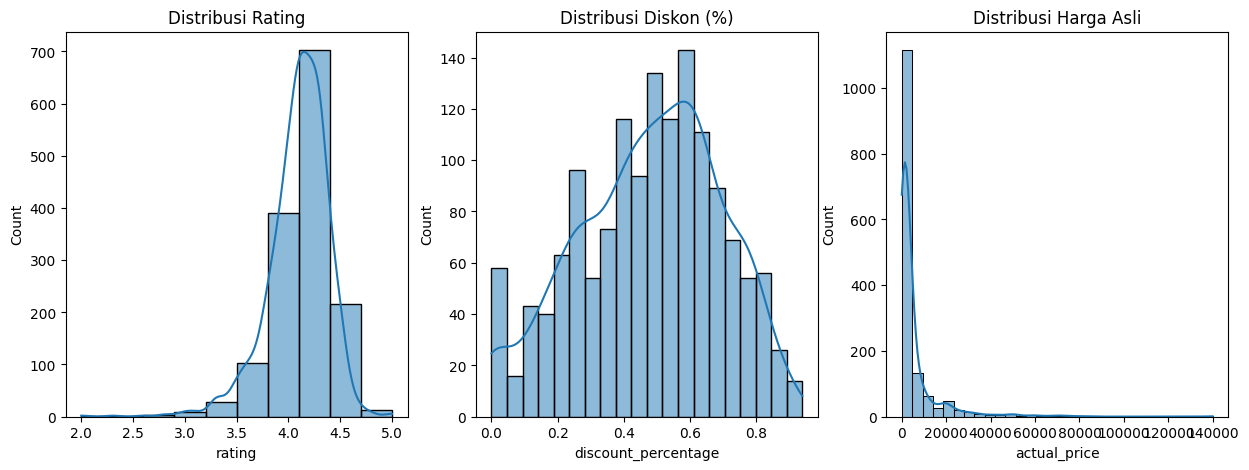

In [ ]:

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['rating'], bins=10, kde=True, ax=ax[0]).set_title('Distribusi Rating')
sns.histplot(df['discount_percentage'], bins=20, kde=True, ax=ax[1]).set_title('Distribusi Diskon (%)')
sns.histplot(df['actual_price'], bins=30, kde=True, ax=ax[2]).set_title('Distribusi Harga Asli')
plt.show()


Visualisasi distribusi dilakukan terhadap tiga variabel utama dalam dataset, yaitu rating, discount_percentage, dan actual_price. Tujuan dari analisis ini adalah untuk memahami pola sebaran masing-masing fitur dan mengidentifikasi karakteristik umum serta potensi outlier yang dapat memengaruhi proses modeling.

Distribusi rating menunjukkan bahwa mayoritas produk memiliki nilai rating yang tinggi, dengan konsentrasi terbesar berada pada rentang 4.0 hingga 4.5. Hal ini mengindikasikan bahwa sebagian besar pelanggan memberikan ulasan positif terhadap produk yang mereka beli. Sebaran yang sempit dan dominan di sisi atas skala rating juga mencerminkan bias umum dalam sistem ulasan e-commerce, di mana produk yang buruk cenderung tidak mendapat banyak review atau dihapus dari platform.

Distribusi discount_percentage memperlihatkan bahwa sebagian besar produk dijual dengan potongan harga yang cukup signifikan. Nilai diskon terbanyak berada pada kisaran 30% hingga 60%, dengan puncak distribusi mendekati 50%. Hal ini menunjukkan bahwa strategi promosi melalui diskon merupakan praktik umum dalam platform Amazon, dan dapat menjadi faktor penting dalam menarik minat pembeli. Meskipun terdapat beberapa produk dengan diskon ekstrem hingga 90%, jumlahnya relatif kecil dan dapat dikategorikan sebagai outlier.

Distribusi actual_price menunjukkan sebaran harga asli produk yang sangat bervariasi. Sebagian besar produk berada pada rentang harga menengah, namun terdapat sejumlah produk dengan harga sangat tinggi yang menyebabkan distribusi menjadi miring ke kanan. Nilai maksimum mencapai ₹139.900, sementara nilai median berada di sekitar ₹1.650. Adanya produk dengan harga jauh di atas rata-rata menunjukkan keberadaan outlier yang perlu diperhatikan, terutama dalam proses normalisasi dan pemodelan agar tidak memengaruhi hasil secara signifikan.

Secara keseluruhan, ketiga distribusi ini memberikan gambaran awal yang penting mengenai karakteristik data. Rating yang tinggi, diskon yang agresif, dan variasi harga yang luas merupakan pola umum dalam dataset, dan masing-masing dapat memberikan kontribusi berbeda terhadap perilaku pembelian dan kepuasan pelanggan.

**Distribusi Kategori Produk**

In [ ]:
df['main_category'] = df['category'].str.split('|').str[0]
category_counts = df['main_category'].value_counts()
category_counts.head(10)


,count
main_category,
Electronics,526
Computers&Accessories,453
Home&Kitchen,448
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


Untuk memahami distribusi kategori produk dalam dataset, dilakukan proses ekstraksi kategori utama dari kolom category. Kolom tersebut awalnya berisi string panjang yang mencakup beberapa level kategori, dipisahkan oleh tanda pemisah |. Dengan menggunakan metode .str.split('|').str[0], kategori pertama dari setiap produk diambil dan disimpan dalam kolom baru bernama main_category. Kategori ini dianggap sebagai representasi utama dari jenis produk yang dijual.

Setelah kategori utama berhasil diekstrak, dilakukan perhitungan frekuensi kemunculan masing-masing kategori menggunakan fungsi value_counts(). Hasil analisis menunjukkan bahwa terdapat tiga kategori yang paling dominan dalam dataset, yaitu Electronics, Computers & Accessories, dan Home & Kitchen. Ketiga kategori ini mencakup sebagian besar produk yang tersedia, dengan jumlah masing-masing mencapai ratusan entri. Sementara itu, kategori lainnya seperti Office Products, Musical Instruments, dan Health & Personal Care hanya muncul dalam jumlah yang sangat kecil, bahkan beberapa hanya memiliki satu atau dua produk.

Distribusi ini menunjukkan bahwa dataset memiliki fokus yang kuat pada produk teknologi dan rumah tangga, yang merupakan segmen utama dalam platform e-commerce seperti Amazon. Informasi ini penting untuk analisis lanjutan, terutama jika dilakukan segmentasi atau pemodelan berdasarkan kategori produk. Kategori minor dapat dipertimbangkan untuk digabung ke dalam kelompok “Lainnya” agar tidak menyebabkan ketidakseimbangan data saat proses pelatihan model.


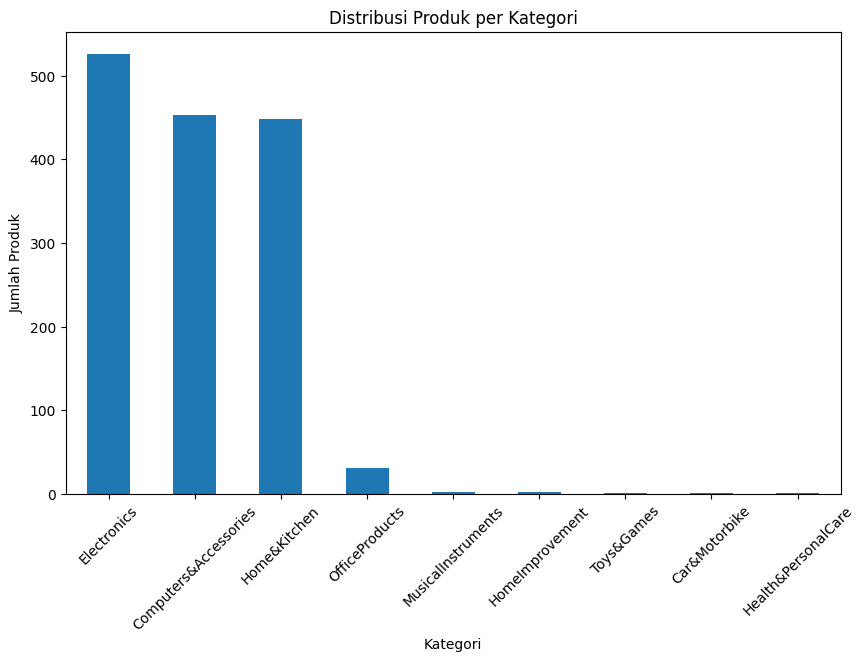

In [ ]:
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar')
plt.title("Distribusi Produk per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Produk")
plt.xticks(rotation=45)
plt.show()


Grafik distribusi produk per kategori menunjukkan adanya ketimpangan yang cukup jelas dalam jumlah produk yang tersedia. Kategori *Electronics* dan *Computers & Accessories* mendominasi dataset dengan jumlah produk yang jauh lebih tinggi dibandingkan kategori lainnya. Hal ini mencerminkan bahwa produk teknologi merupakan segmen utama dalam platform e-commerce, dengan variasi dan permintaan yang lebih besar. Sementara itu, kategori seperti *Home & Kitchen* juga menempati posisi penting, menunjukkan bahwa kebutuhan rumah tangga menjadi salah satu fokus pasar.  

Di sisi lain, kategori seperti *Office Products*, *Musical Instruments*, dan *Health & Personal Care* memiliki jumlah produk yang relatif kecil. Ketimpangan ini menandakan bahwa dataset lebih terpusat pada kategori mayoritas, sehingga analisis atau pemodelan yang melibatkan variabel kategori perlu memperhatikan potensi bias. Produk dari kategori minor dapat dipertimbangkan untuk digabungkan ke dalam kelompok “lainnya” agar distribusi lebih seimbang dan hasil analisis lebih representatif.

**Distribusi Rating dan Diskon**

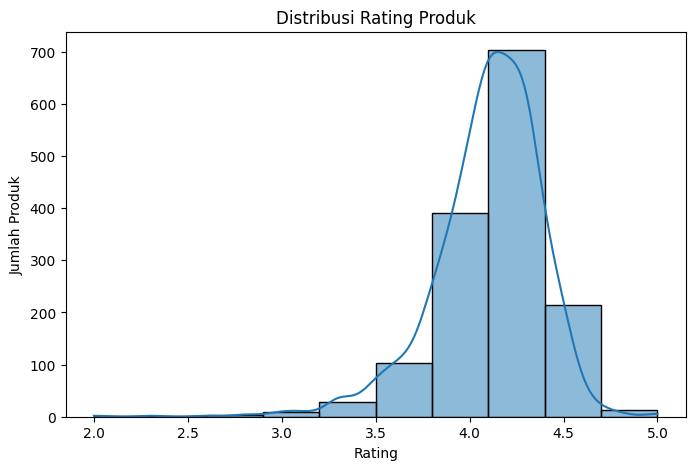

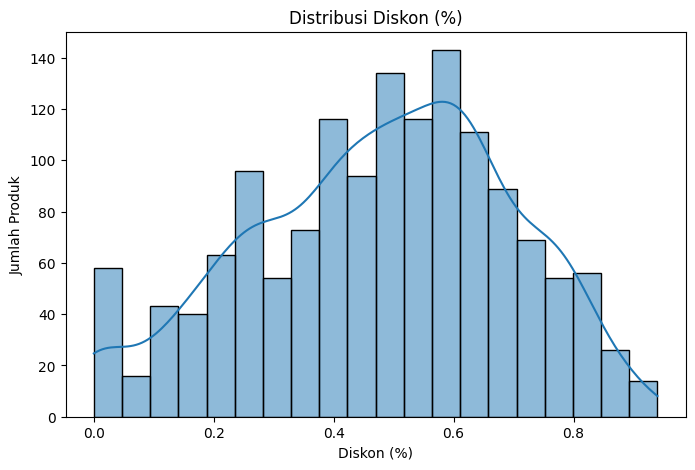

In [ ]:

plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Jumlah Produk')

plt.figure(figsize=(8,5))
sns.histplot(df['discount_percentage'], bins=20, kde=True)
plt.title('Distribusi Diskon (%)')
plt.xlabel('Diskon (%)')
plt.ylabel('Jumlah Produk')

plt.show()




Distribusi rating produk menunjukkan bahwa mayoritas produk memiliki ulasan positif dengan konsentrasi terbesar pada kisaran 4.0 hingga 4.5, sedangkan produk dengan rating rendah relatif jarang ditemukan. Sementara itu, distribusi diskon memperlihatkan bahwa sebagian besar produk ditawarkan dengan potongan harga signifikan, terutama pada kisaran 30% hingga 60%, dengan rata-rata mendekati 50%. Kondisi ini menegaskan bahwa produk dalam dataset cenderung memiliki kualitas yang baik menurut pelanggan dan secara bersamaan dipasarkan dengan strategi diskon yang agresif untuk menarik minat pembeli.

**`Distribus Rating Terhadap Diskon dan Harga Asli**

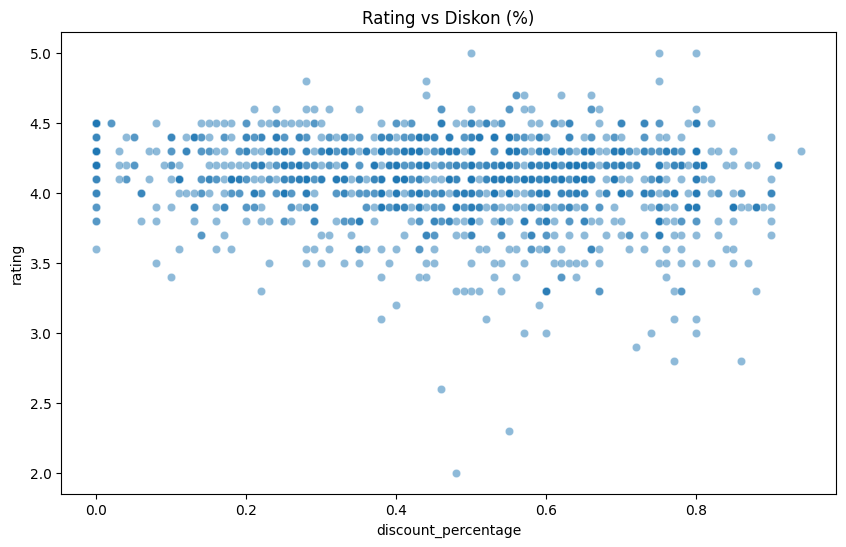

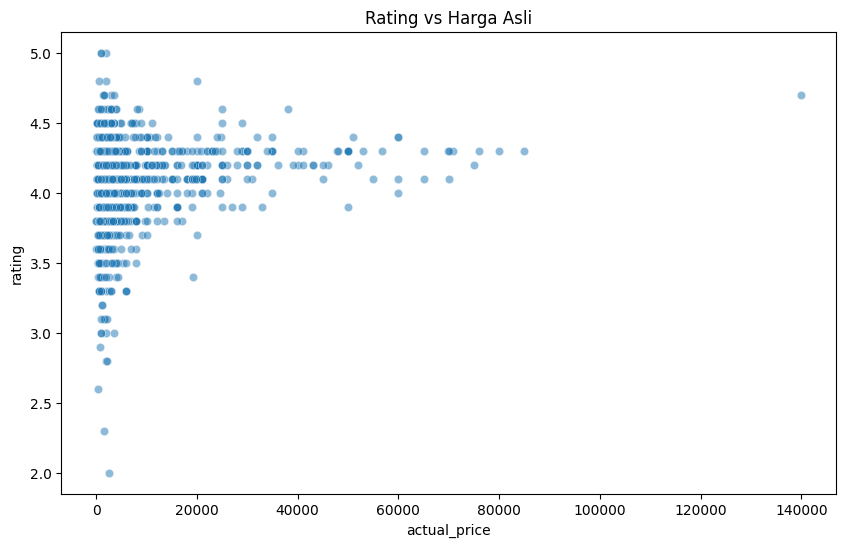

In [ ]:
# Rating vs Diskon
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percentage', y='rating', data=df, alpha=0.5)
plt.title('Rating vs Diskon (%)')
plt.show()

# Rating vs Harga Asli
plt.figure(figsize=(10,6))
sns.scatterplot(x='actual_price', y='rating', data=df, alpha=0.5)
plt.title('Rating vs Harga Asli')
plt.show()


Visualisasi hubungan antara rating dengan diskon menunjukkan bahwa produk dengan tingkat diskon tinggi tetap memperoleh rating yang relatif baik, dengan mayoritas nilai berada pada kisaran 4.0 hingga 4.5. Hal ini mengindikasikan bahwa besarnya potongan harga tidak secara langsung memengaruhi kualitas ulasan pelanggan, sehingga diskon lebih berperan sebagai strategi pemasaran daripada penentu kepuasan konsumen.  

Sementara itu, hubungan antara rating dengan harga asli memperlihatkan bahwa produk dengan harga tinggi maupun rendah sama-sama cenderung memiliki rating yang baik. Tidak terdapat pola yang jelas antara harga asli dan kualitas ulasan, sehingga dapat disimpulkan bahwa persepsi pelanggan terhadap produk lebih dipengaruhi oleh faktor lain seperti kualitas, merek, atau pengalaman penggunaan, bukan semata-mata oleh harga jual.

**Korelasi Antar Fitur**

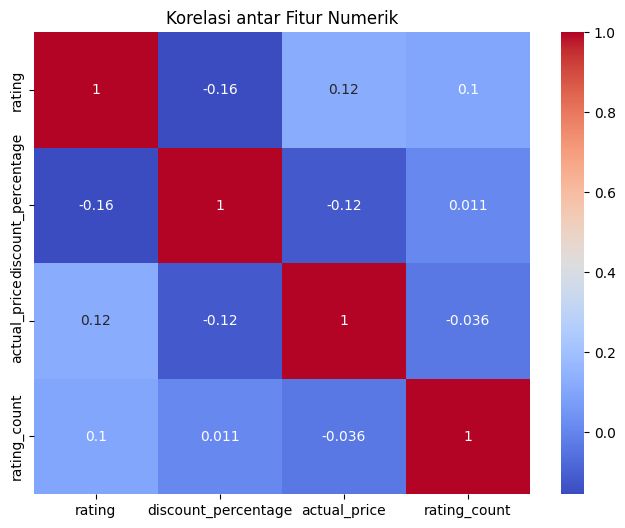

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['rating','discount_percentage','actual_price','rating_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()


Hasil visualisasi korelasi antar fitur numerik menunjukkan adanya hubungan yang berbeda tingkat kekuatannya antara variabel-variabel utama dalam dataset. Nilai korelasi antara discount_percentage dan actual_price relatif rendah, menandakan bahwa besarnya harga asli tidak secara langsung menentukan besar kecilnya diskon yang diberikan. Sebaliknya, terdapat korelasi positif yang cukup jelas antara discount_percentage dan rating_count, yang mengindikasikan bahwa produk dengan diskon lebih tinggi cenderung menarik lebih banyak ulasan dari pelanggan.

Selain itu, variabel rating memiliki korelasi yang sangat lemah terhadap variabel lain, baik terhadap harga maupun diskon. Hal ini menunjukkan bahwa kualitas ulasan pelanggan lebih dipengaruhi oleh faktor non-numerik seperti pengalaman penggunaan, merek, atau kualitas produk, bukan semata-mata oleh harga atau besarnya potongan. Secara keseluruhan, heatmap ini menegaskan bahwa strategi diskon berperan dalam meningkatkan interaksi konsumen melalui jumlah ulasan, sementara rating tetap relatif independen dari faktor harga dan diskon.